In [1]:
# Standard Dependencies
import os
import numpy as np
import pandas as pd
from math import sqrt

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics
from statistics import median
from scipy import signal
from scipy.special import factorial  # Updated to use the correct factorial
import scipy.stats as stats
from scipy.stats import sem, binom, lognorm, poisson, bernoulli, spearmanr
from scipy.fftpack import fft, fftshift

# Scikit-learn for Machine Learning models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Seed for reproducability
seed = 12345
np.random.seed(seed)


# Read in csv of Toy Dataset

df = pd.read_csv('toy_dataset.csv')




# Discrete and Continuous Variables 
A discrete variable is a variable that can only take on a "countable" number of values. If you can count a set of items, then it’s a discrete variable. An example of a discrete variable is the outcome of a dice. It can only have 1 of 6 different possible outcomes and is therefore discrete. A discrete random variable can have an infinite number of values. For example, the whole set of natural numbers (1,2,3,etc.) is countable and therefore discrete.

A continuous variable takes on an "uncountable" number of values. An example of a continuous variable is length. Length can be measured to an arbitrary degree and is therefore continuous.

In statistics we represent a distribution of discrete variables with PMF's (Probability Mass Functions) and CDF's (Cumulative Distribution Functions). We represent distributions of continuous variables with PDF's (Probability Density Functions) and CDF's.

The PMF defines the probability of all possible values x of the random variable. A PDF is the same but for continuous values. The CDF represents the probability that the random variable X will have an outcome less or equal to the value x. The name CDF is used for both discrete and continuous distributions.

The functions that describe PMF's, PDF's and CDF's can be quite daunting at first, but their visual counterpart often looks quite intuitive.

PMF (Probability Mass Function)
Here we visualize a PMF of a binomial distribution. You can see that the possible values are all integers. For example, no values are between 50 and 51.

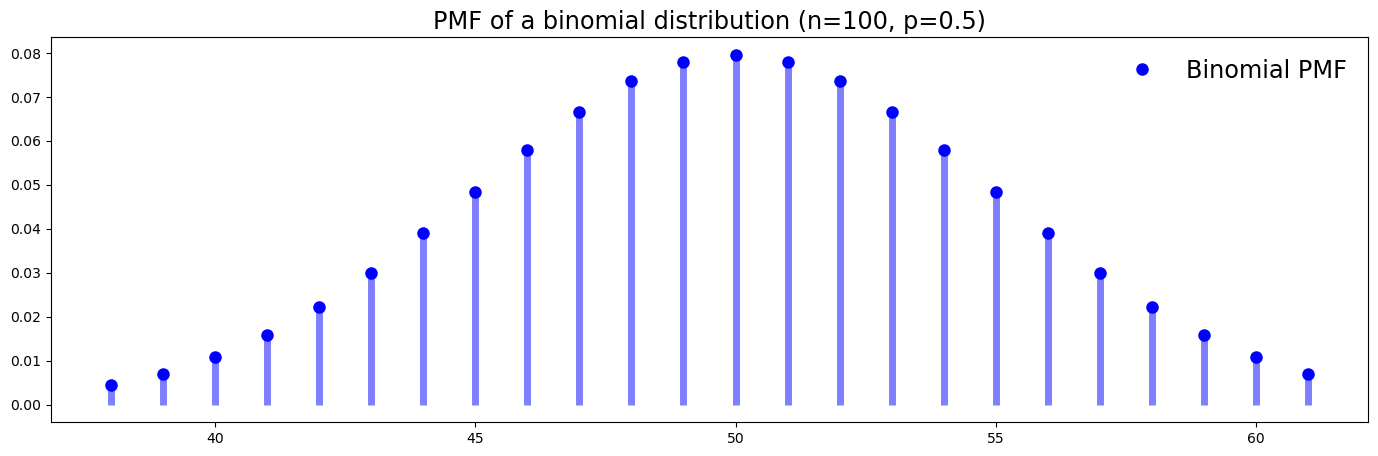

In [2]:
# PMF Visualization
n = 100
p = 0.5

fig, ax = plt.subplots(1, 1, figsize=(17,5))
x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='Binomial PMF')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
rv = binom(n, p)
#ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='frozen PMF')
ax.legend(loc='best', frameon=False, fontsize='xx-large')
plt.title('PMF of a binomial distribution (n=100, p=0.5)', fontsize='xx-large')
plt.show()

# PDF (Probability Density Functions)
The PDF is the same as a PMF, but continuous. It can be said that the distribution has an infinite number of possible values. Here we visualize a simple normal distribution with a mean of 0 and standard deviation of 1.

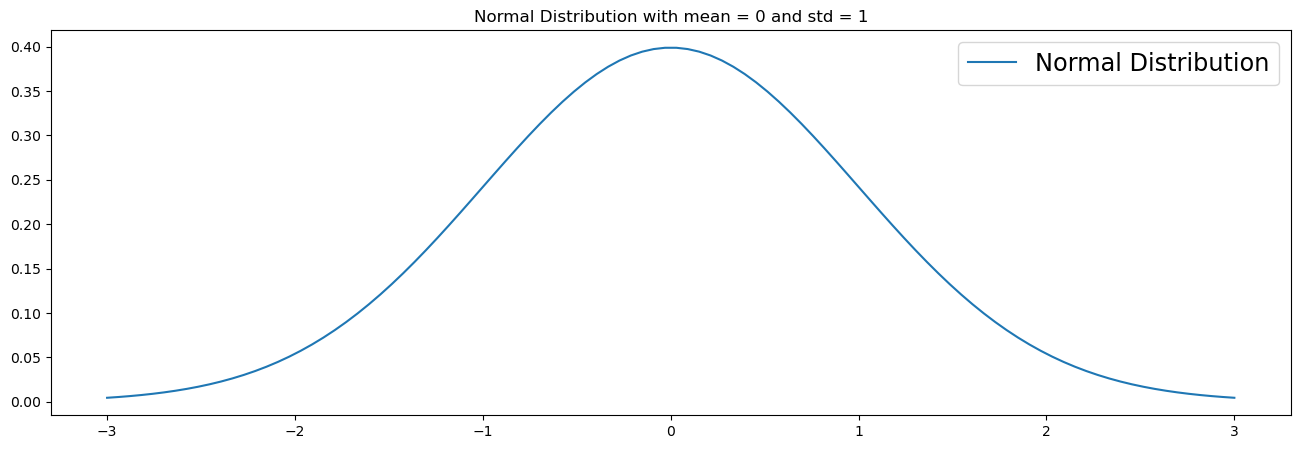

In [3]:
mu = 0
variance = 1
sigma = sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.figure(figsize=(16,5))
plt.plot(x, stats.norm.pdf(x, mu, sigma), label='Normal Distribution')
plt.title('Normal Distribution with mean = 0 and std = 1')
plt.legend(fontsize='xx-large')
plt.show()

# Distributions 
A Probability distribution tells us something about the likelihood of each value of the random variable.

A random variable X is a function that maps events to real numbers.

The visualizations in this section are of discrete distributions. Many of these distributions can however also be continuous.

# Uniform Distribution
A Uniform distribution is pretty straightforward. Every value has an equal change of occuring. Therefore, the distribution consists of random values with no patterns in them. In this example we generate random floating numbers between 0 and 1.

In [4]:
uniform_dist = np.random.random(1000)
uniform_df = pd.DataFrame({'value' : uniform_dist})
uniform_dist = pd.Series(uniform_dist)

Text(0.5, 1.0, 'Scatterplot of a Random/Uniform Distribution')

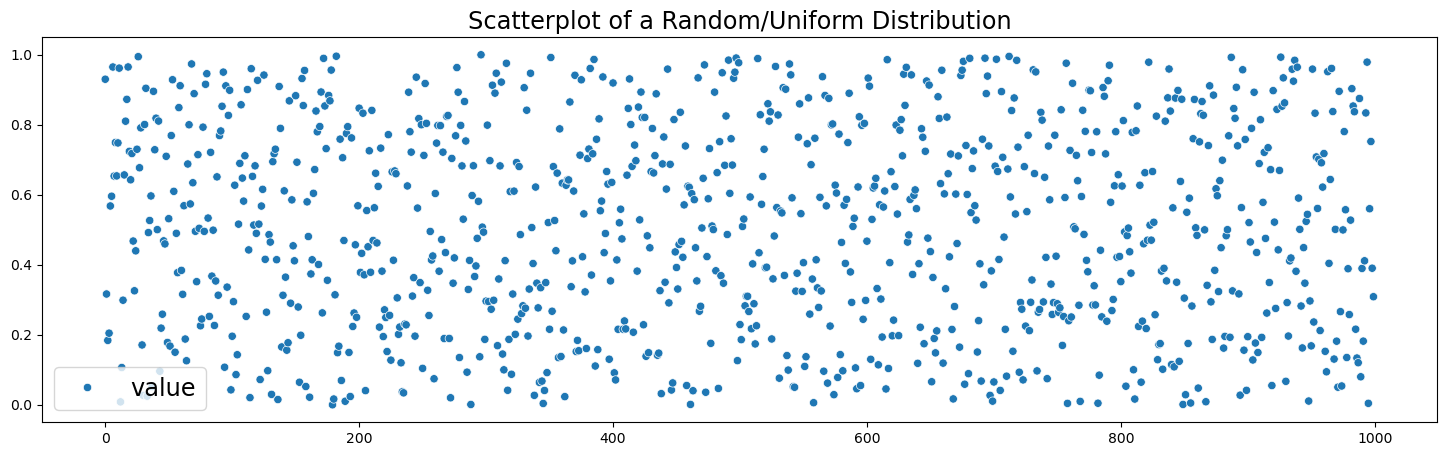

In [5]:
plt.figure(figsize=(18,5))
sns.scatterplot(data=uniform_df)
plt.legend(fontsize='xx-large')
plt.title('Scatterplot of a Random/Uniform Distribution', fontsize='xx-large')

C:\Users\keith\AppData\Local\Temp\ipykernel_4404\1098536719.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(uniform_df)


Text(0.5, 1.0, 'Random/Uniform distribution')

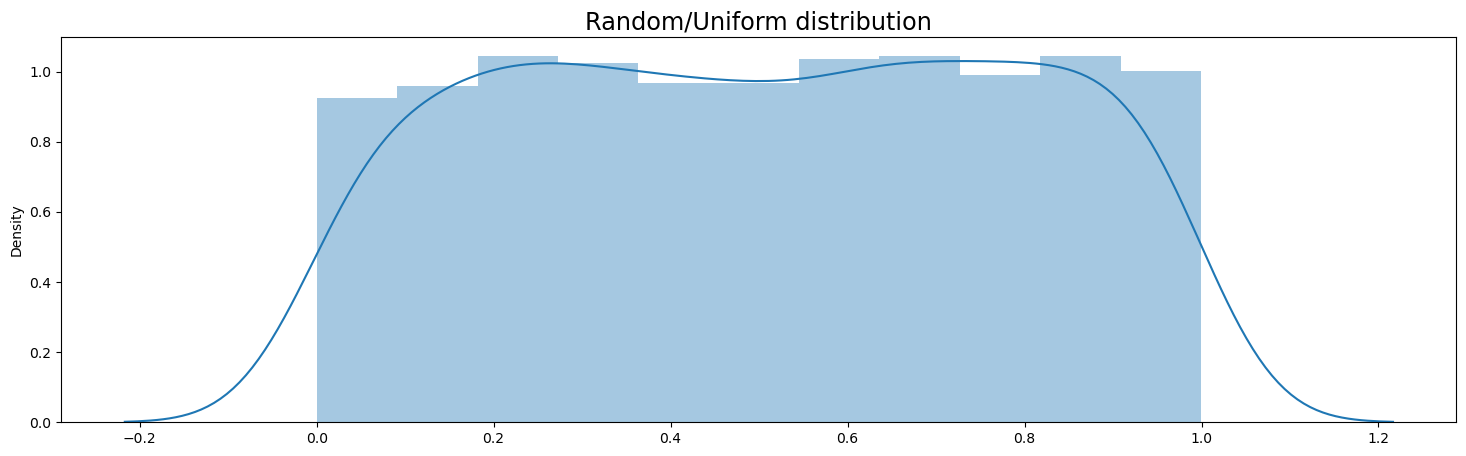

In [6]:
plt.figure(figsize=(18,5))
sns.distplot(uniform_df)
plt.title('Random/Uniform distribution', fontsize='xx-large')

# Normal Distribution

A normal distribution (also called Gaussian or Bell Curve) is very common and convenient. This is mainly because of the Central Limit Theorem (CLT), which states that as the amount independent random samples (like multiple coin flips) goes to infinity the distribution of the sample mean tends towards a normal distribution.

In [7]:
normal_dist = np.random.randn(10000)
normal_df = pd.DataFrame({'value' : normal_dist})
# Create a Pandas Series for easy sample function
normal_dist = pd.Series(normal_dist)

normal_dist2 = np.random.randn(10000)
normal_df2 = pd.DataFrame({'value' : normal_dist2})
# Create a Pandas Series for easy sample function
normal_dist2 = pd.Series(normal_dist)

normal_df_total = pd.DataFrame({'value1' : normal_dist, 
                                'value2' : normal_dist2})

Text(0.5, 1.0, 'Scatterplot of a Normal Distribution')

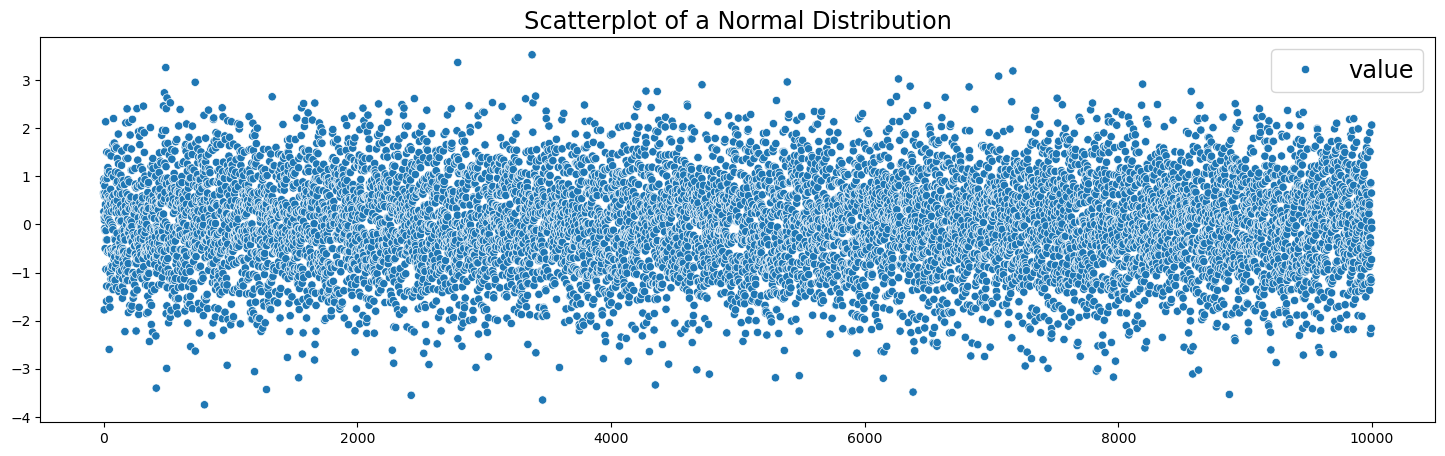

In [8]:
plt.figure(figsize=(18,5))
sns.scatterplot(data=normal_df)
plt.legend(fontsize='xx-large')
plt.title('Scatterplot of a Normal Distribution', fontsize='xx-large')

C:\Users\keith\AppData\Local\Temp\ipykernel_4404\3691376924.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normal_df)


Text(0.5, 1.0, 'Normal distribution (n=1000)')

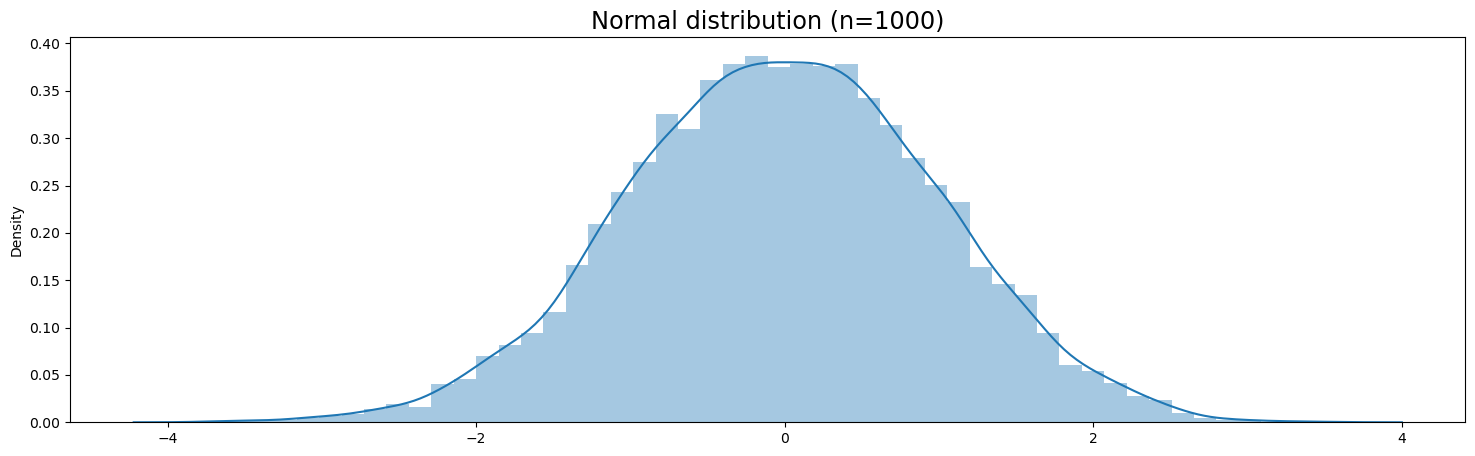

In [9]:
plt.figure(figsize=(18,5))
sns.distplot(normal_df)
plt.title('Normal distribution (n=1000)', fontsize='xx-large')

# Binomial Distribution¶
A Binomial Distribution has a countable number of outcomes and is therefore discrete.

Binomial distributions must meet the following three criteria:

The number of observations or trials is fixed. In other words, you can only figure out the probability of something happening if you do it a certain number of times.
Each observation or trial is independent. In other words, none of your trials have an effect on the probability of the next trial.
The probability of success is exactly the same from one trial to another.
An intuitive explanation of a binomial distribution is flipping a coin 10 times. If we have a fair coin our chance of getting heads (p) is 0.50. Now we throw the coin 10 times and count how many times it comes up heads. In most situations we will get heads 5 times, but there is also a change that we get heads 9 times. The PMF of a binomial distribution will give these probabilities if we say N = 10 and p = 0.5. We say that the x for heads is 1 and 0 for tails. 

A Bernoulli Distribution is a special case of a Binomial Distribution.

All values in a Bernoulli Distribution are either 0 or 1.

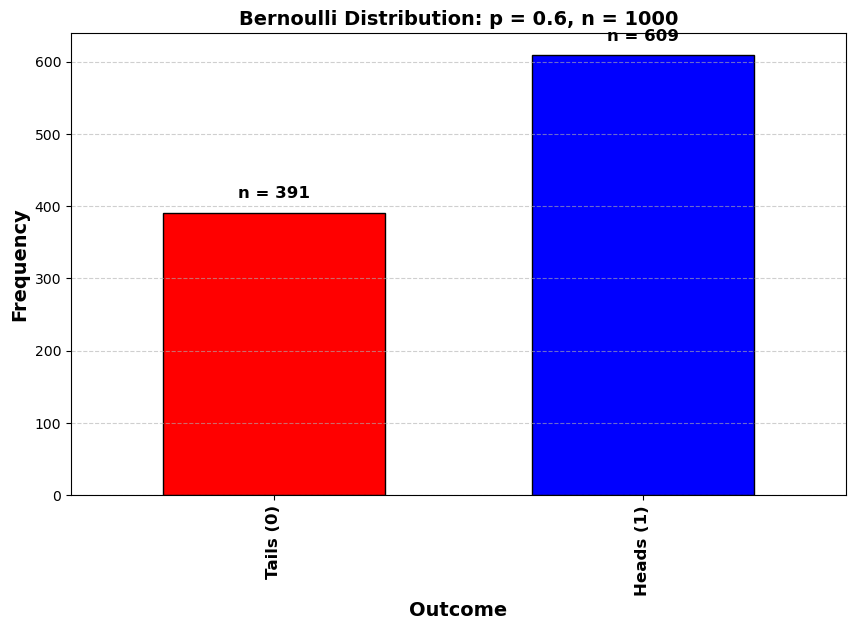

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

# Probability of heads
p = 0.6

# Create Bernoulli samples
bern_dist = bernoulli.rvs(p, size=1000)
bern_df = pd.DataFrame({'value': bern_dist})
bern_values = bern_df['value'].value_counts().sort_index()

# Ensure both 0 and 1 exist in the counts
num_heads = bern_values.get(1, 0)
num_tails = bern_values.get(0, 0)

# Set figure size and background color
plt.figure(figsize=(10, 6), facecolor='white')
ax = bern_values.plot(kind='bar', color=['red', 'blue'], width=0.6, edgecolor='black')

# Annotate the bars
for i, v in enumerate(bern_values):
    ax.text(i, v + 20, f'n = {v}', ha='center', fontsize=12, fontweight='bold', color='black')

# Labels and title
plt.xlabel("Outcome", fontsize=14, fontweight='bold')
plt.ylabel("Frequency", fontsize=14, fontweight='bold')
plt.xticks(ticks=[0, 1], labels=["Tails (0)", "Heads (1)"], fontsize=12, fontweight='bold')
plt.title("Bernoulli Distribution: p = 0.6, n = 1000", fontsize=14, fontweight='bold')

# Gridlines for readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()



# Poisson Distribution
The Poisson distribution is a discrete distribution and is popular for modelling the number of times an event occurs in an interval of time or space.

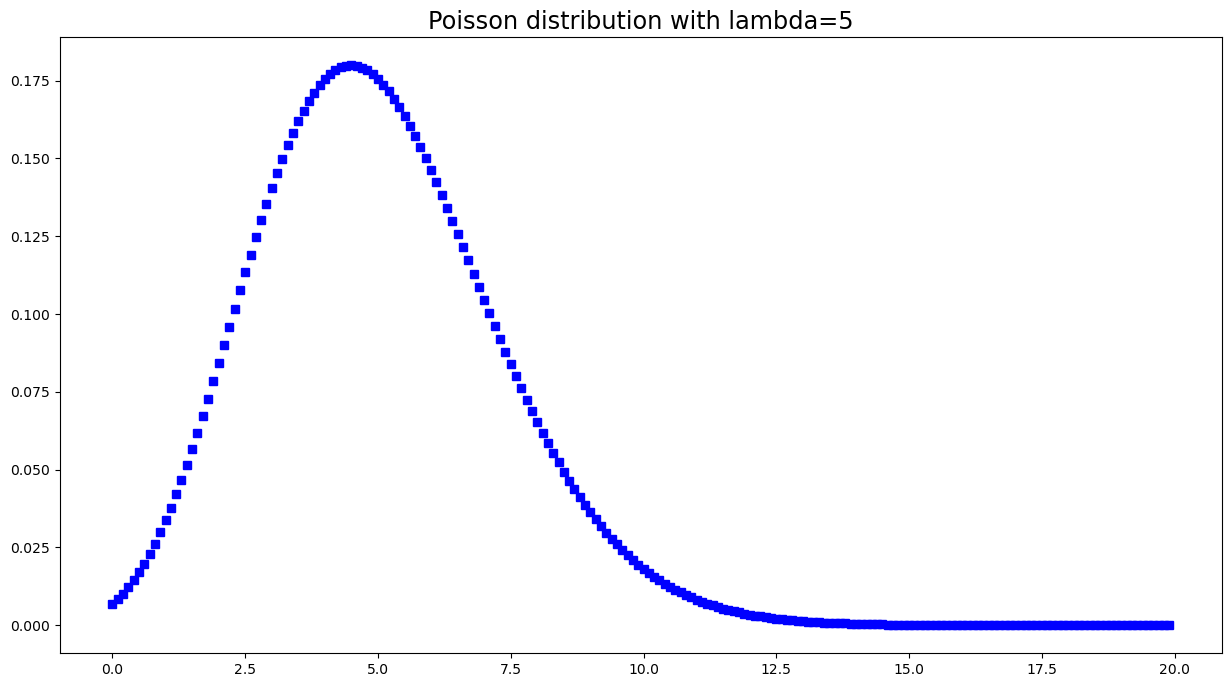

In [15]:
x = np.arange(0, 20, 0.1)
y = np.exp(-5)*np.power(5, x)/factorial(x)

plt.figure(figsize=(15,8))
plt.title('Poisson distribution with lambda=5', fontsize='xx-large')
plt.plot(x, y, 'bs')
plt.show()

# Log-Normal Distribution
A log-normal distribution is continuous. The main characteristic of a log-normal distribution is that it's logarithm is normally distributed. It is also referred to as Galton's distribution.

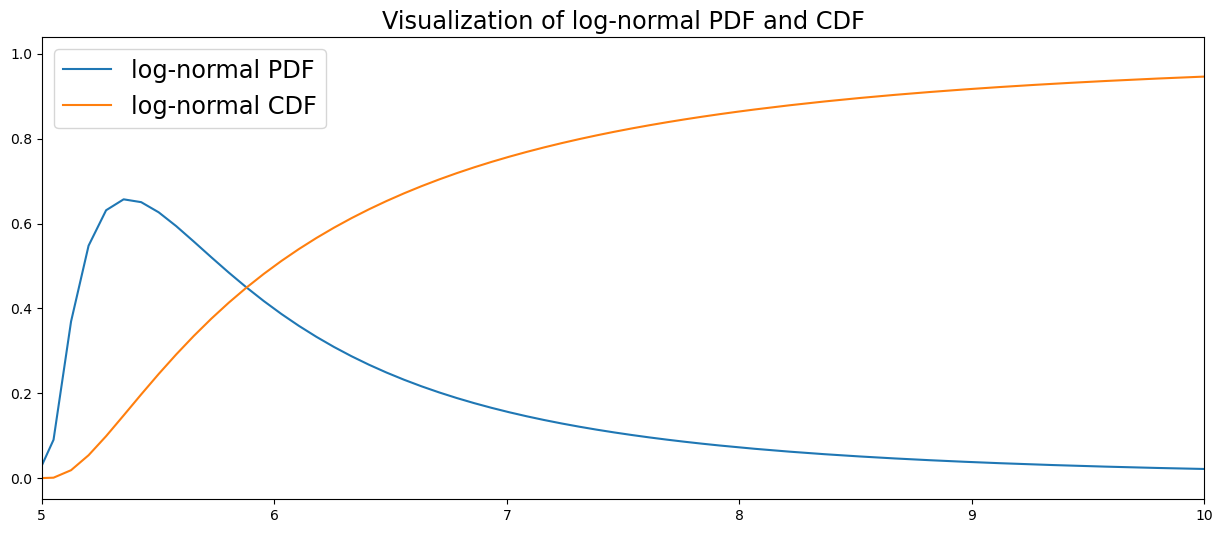

In [17]:
std = 1
mean = 5

# Create log-normal distribution
dist=lognorm(std,loc=mean)
x=np.linspace(0,15,200)

# Visualize log-normal distribution
plt.figure(figsize=(15,6))
plt.xlim(5, 10)
plt.plot(x,dist.pdf(x), label='log-normal PDF')
plt.plot(x,dist.cdf(x), label='log-normal CDF')
plt.legend(fontsize='xx-large')
plt.title('Visualization of log-normal PDF and CDF', fontsize='xx-large')
plt.show()